<a href="https://colab.research.google.com/github/restrepo/Calculus/blob/master/Differential_Calculus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


__IMPORTANT TIP__: To proper see the mathematical formulas open in Colab with the button in the first cell

# Numerical derivative
## straight line equations
Consider the following straight line:
$$ y=3x\,, $$
with two benchmark points $(x_1,y_1)=(1,3)$, $(x_2,y_2)=(3,9)$. 

From the general equation
$$y=mx+b\,,$$
we can can calculate the _slope_ $m$ and the _intercept_ $b$ if we know two points. The _slope_ $m$ can be calculated as
$$m=\frac{y_2-y_1}{x_2-x_1}=\frac{9-3}{3-1}=\frac{6}{2}=3\,,$$
while the intercept $b$ is obtained from just one of the benchmark points from
\begin{align}
b=y-mx\,,\qquad\qquad (1)
\end{align}
e.g,
$$b=y_1-m x_1=3-3\times 1=0$$



## Passing one straight line trough a curve
Consider fig. 1 below.

[]

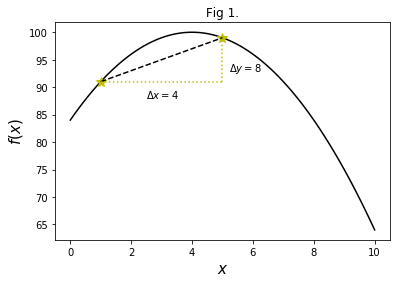

In [0]:
x100=np.linspace(0,10,100)
def f(x):
    if isinstance(x,list):
        x=np.array(x)
    return -(x-4)**2+100
plt.plot(x100,f(x100),'k-')
xs=np.array([1,5])
plt.plot(xs,f(xs),'y*',markersize=10)
plt.plot(xs,f(xs),'k--',markersize=10)
plt.title('Fig 1.')
plt.ylabel('$f(x)$',size=15)
plt.xlabel('$x$',size=15)
plt.plot( xs,[f(xs[0]),f(xs[0])],'y:' )
plt.plot( [xs[1],xs[1]],f(xs),'y:' )
plt.text(2.5,88,r'$\Delta x={}$'.format(xs[1]-xs[0]))
plt.text(5.2,93,r'$\Delta y={}$'.format( f(xs[1])-f(xs[0])))
#plt.legend(loc='best')
plt.plot()

We want to define the _straigth line_ which passes for two points of some curve with some spacing $\Delta x$. We need the set of $x$-points, with some spacing $\Delta x$, the evaluation of some function $f(x)$ of those points, and the _slope_ of the straight line. The corresponding function, implementing eq.(1), is shown below 

In [0]:
def slope(x,y,m):
    '''
    Use the initial points `(x[0],y[0])` and the slope `m`
    to define an straight line as function of `x`:
      f(x)=mx+b
    '''
    x=np.asarray(x)
    y=np.asarray(y)
    b=y[0]-m*x[0]
    return m*x+b

As an example, let us use the two points with $\Delta x=4$ in Fig. 1. To find $m$ we can use the previuos two starred points

In [0]:
Δy=f(xs[1])-f(xs[0])
Δx=xs[1]-xs[0]
m=Δy/Δx
m

2.0

By using the `slope` function we have

Text(0.5, 0, '$x$')

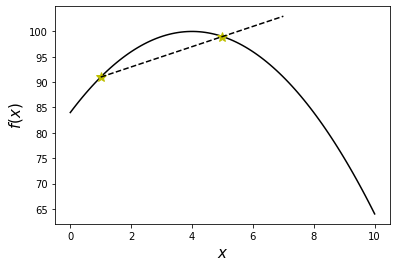

In [0]:
plt.plot(x100,f(x100),'k-')
xs=np.array([1,5])
plt.plot(xs,f(xs),'y*',markersize=10)
x=np.linspace(xs[0],7)
plt.plot(x,slope(x,f(x),m),'k--')
plt.ylabel('$f(x)$',size=15)
plt.xlabel('$x$',size=15)

## Studying the changes along a curve
Let us start with just one straight line. 

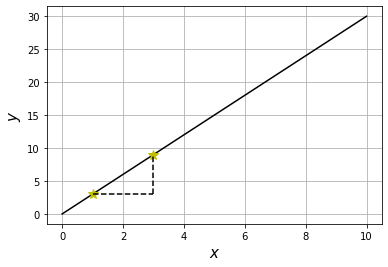

In [0]:
x=np.linspace(0,10,11)
def f(x):
    return 3*x

plt.plot(x,f(x),'k-')
plt.plot(1,f(1),'y*',markersize=10)
plt.plot(3,f(3),'y*',markersize=10)
plt.plot([1,f(1)],[3,f(1)],'k--')
plt.plot([3,f(1)],[3,f(3)],'k--')
plt.xlabel('$x$',size=15)
plt.ylabel('$y$',size=15)
plt.grid()

The main property of the straight line is that the same _slope_ is constant for any pair of points on it. To illustrate this explicitly, it is convenient to review the [slicing of a list in Python](https://railsware.com/blog/python-for-machine-learning-indexing-and-slicing-for-lists-tuples-strings-and-other-sequential-types/) [[Backup](https://web.archive.org/web/20190717104623/https://railsware.com/blog/python-for-machine-learning-indexing-and-slicing-for-lists-tuples-strings-and-other-sequential-types/)].

Let an array like the previous one created with `numpy` for $N=11$ points

In [0]:
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

The sequence of intitial $N-1=10$ points, $x_i$, is defined as all the points except by the last one:

In [0]:
x[:-1]

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

while the sequence of the final $N-1=10$ points, $x_{i+1}$, is defined as

In [0]:
x[1:]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

we can define the sequence of the $N-1=10$ differences between the final and intial points in $x$ as

In [0]:
Δx=x[1:]-x[:-1]
Δx

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

while the corresponding sequence of the $N-1=10$ differences between the final and intial points in $y$ is just

In [0]:
Δy=f(x[1:])-f(x[:-1])
Δy            

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

We can now check that the $N-1=10$ slopes are all the same

In [0]:
m=Δy/Δx
m

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

and we can rebuild the full function just by joining the $N-1=10$ straigth lines

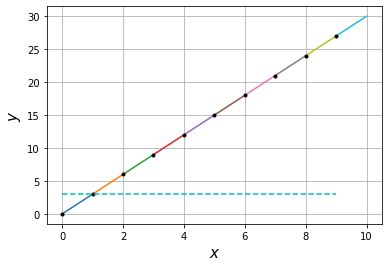

In [0]:
for i in range(Δx.size):
    plt.plot(x[i:i+2],slope(x[i:i+2],f(x[i:i+2]),m[i]) )
    
plt.plot(x[:-1],f(x[:-1]),'k.')
plt.plot(x[:-1],m,'c--')
plt.xlabel('$x$',size=15)
plt.ylabel('$y$',size=15)
plt.grid()

Let us now to check the changes in the slope for the curve in Fig. 1 along $N=6$ points with same spacing $\Delta x$

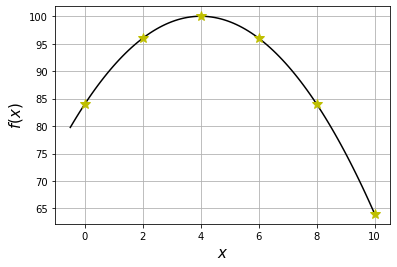

In [0]:
N=6
x100=np.linspace(-0.5,10,100)
x=np.linspace(0,10,6)
def f(x):
    if isinstance(x,list):
        x=np.array(x)
    return -(x-4)**2+100
plt.plot(x100,f(x100),'k-')
plt.plot(x,f(x),'y*',markersize=10)
plt.ylabel('$f(x)$',size=15)
plt.xlabel('$x$',size=15)
plt.grid()

Now the slope is different for each one of the $N-1=5$ straight lines

In [0]:
x=np.linspace(0,10,N)
Δx=x[1:]-x[:-1]
Δy=f(x[1:])-f(x[:-1])
m=Δy/Δx
m

array([  6.,   2.,  -2.,  -6., -10.])

Moreover, the $N-1=5$ straigth lines, shown in colors below, are a good approach to the real curve shown as the dashed cyan curve below. 

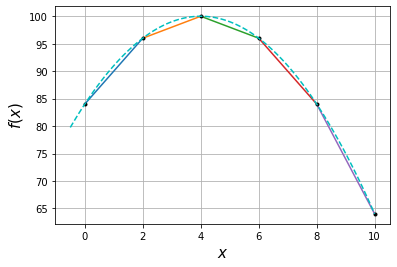

In [0]:
for i in range(Δx.size):
    plt.plot(x[i:i+2],slope(x[i:i+2],f(x[i:i+2]),m[i]) )
    
plt.plot(x,f(x),'k.')
plt.plot(x100,f(x100),'c--')
plt.ylabel('$f(x)$',size=15)
plt.xlabel('$x$',size=15)
plt.grid()

Note in fact that the dashed curve is really formed by 99 straight lines which are not longer visible by the naked eye. By zooming out around $x=4$

Text(0.5, 0, '$x$')

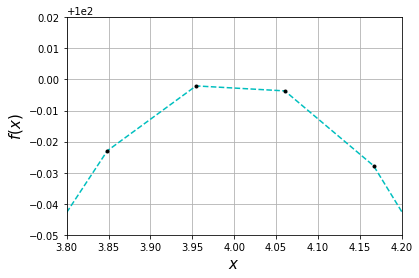

In [0]:
plt.plot(x100,f(x100),'c--')
plt.plot(x100,f(x100),'k.')
plt.grid()
plt.xlim(3.8,4.2)
plt.ylim(99.95,100.02)
plt.ylabel('$f(x)$',size=15)
plt.xlabel('$x$',size=15)

## Derivative definition

Now we will focus in the intial slope as we change the size of $\Delta x$

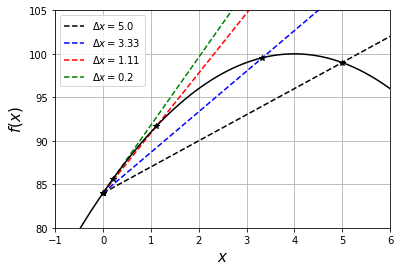

In [0]:
i=0
mk=['k','b','r','g','y','c','m']
#xend=[2,4,6]
j=0
for N in [3,4,10,50]:
    x=np.linspace(0,10,N)
    Δx=x[1:]-x[:-1]
    Δy=f(x[1:])-f(x[:-1])
    m=Δy/Δx
    plt.plot(x[i:],slope(x[i:],f(x[i:]),m[i]),'{}--'.format(mk[j]),
             label=r'$\Delta x={}$'.format(round(x[1]-x[0],2)) )
    plt.plot(x[:2],f(x[:2]),'k*')
    j=j+1

plt.plot(x100,f(x100),'k-')
plt.ylabel('$f(x)$',size=15)
plt.xlabel('$x$',size=15)
plt.grid()
plt.ylim(80,105)
plt.xlim(-1,6)
plt.legend(loc='best')

We can see that as $\Delta x\to 0$ the slope approach to the _tangent line_ to the curve. The tangent line (or simply tangent) to a plane curve at a given point is the straight line that "just touches" the curve at that point.
We define the derivative of $f(x)$ at point $x_0$: $f'(x_0)$ as the tangent to a curve at point $x_0$. 

In general
$$f'(x)=\lim_{\Delta x\to 0}\frac{\Delta y}{\Delta x}\,,$$
is the tangent to the curve at point $x$. More specifically for two points $(x_i,f(x_i))$ and $(x_{i+1},f(x_{i+1}))$ at one curve, the derivative at $x_i$ is
$$f'(x_i)=\lim_{x_{i+1}\to x_i}\frac{f(x_{i+1})-f(x_i)}{x_{i+1}-x_i}\,.$$

By following the derivative of the function, we can rebuild the function itself. Since
$x_{i+1}-x_i=\Delta x$, we have that $x_{i+1}=x_i+\Delta x$. Therefore, the derivative at $x$ can be definied as
$$f'(x)=\lim_{\Delta x\to 0}\frac{f(x+\Delta x)-f(x)}{\Delta x}\,,\qquad\qquad (2)$$
where the fraction corresponds to the increased function minus the function without increasing over the increasing.

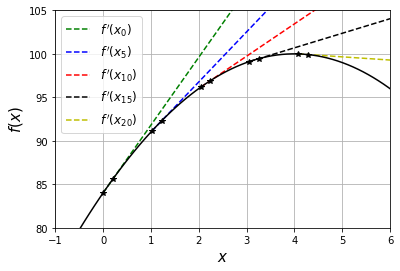

In [0]:
i=10
mk=['g','b','r','k','y','c','m']
#xend=[2,4,6]
j=0
for N in [50]:
    x=np.linspace(0,10,N)
    Δx=x[1:]-x[:-1]
    Δy=f(x[1:])-f(x[:-1])
    m=Δy/Δx
    for i in [0,5,10,15,20]:
        plt.plot(x[i:],slope(x[i:],f(x[i:]),m[i]),'{}--'.format(mk[j]),
                label=r"$f\,'(x_{{{}}})$".format(i) )
        plt.plot(x[i:i+2],f(x[i:i+2]),'k*')
        j+=1

plt.plot(x100,f(x100),'k-')
plt.ylabel('$f(x)$',size=15)
plt.xlabel('$x$',size=15)
plt.grid()
plt.ylim(80,105)
plt.xlim(-1,6)
plt.legend(loc='best',fontsize=12)

By evaluating the derivative in each point we can build a new function $f'(x)$ that is the derivative of $f(x)$

Text(0.5, 1.0, 'Figure 2.')

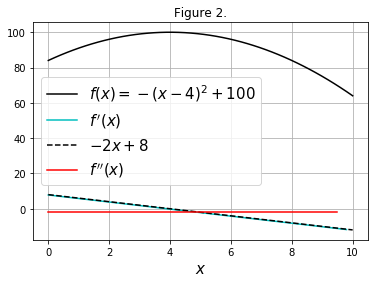

In [0]:
plt.plot(x,f(x),'k-',label='$f(x)=-(x-4)^2+100$')
plt.plot(x[:-1],m,'c-',label="$f\,'(x)$")
plt.plot(x,-2*x+8,'k--',label='$-2x+8$')
plt.xlabel('$x$',size=15)
#Second derivative
def fp(x):
    return -2*x+8
xp=np.linspace(0,10,20)
Δxp=xp[1:]-xp[:-1]
Δyp=fp(xp[1:])-fp(xp[:-1])
mp=Δyp/Δxp
plt.plot(xp[:-1],mp,'r-',label="$f\,''(x)$")
plt.grid()
legend(loc='best',fontsize=15)
plt.title('Figure 2.')

Until now...
* The derivative of polynomial of degree 2 is a straight line.
* The derivative of a straight line is a constant.
* It is clear tat the derivative of an horizontal line is cero. Therefore if $f(x)=a$, with $a$ a constant, then $f'(x)=0$

## Analytical calculations

Analytical calculations for the derivative of $f(x)$ can be done from eq. (2):

* For $f(x)=a$ where $a$ is a constant, imply that $f(x+\Delta x)=a$. Therefore  
\begin{align}
f'(x)=&\lim_{\Delta x\to 0}\frac{f(x+\Delta x)-f(x)}{\Delta x}\\
&\lim_{\Delta x\to 0}\frac{a-a}{\Delta x}=0\,.
\end{align}

* For $f(x)=x$
\begin{align}
f'(x)=&\lim_{\Delta x\to 0}\frac{x+\Delta x-x}{\Delta x}\\
     =& \lim_{\Delta x\to 0}\frac{\Delta x}{\Delta x}\\
     =& 1\,.
\end{align}

* For $f(x)=x^2$ 
\begin{align}
f'(x)=&\lim_{\Delta x\to 0}\frac{(x+\Delta x)^2-x^2}{\Delta x}\\
     =& \lim_{\Delta x\to 0}\frac{x^2+2x\Delta x + (\Delta x)^2-x^2}{\Delta x}\\
     =& \lim_{\Delta x\to 0}\frac{2x\Delta x + (\Delta x)^2}{\Delta x}\\
     =& \lim_{\Delta x\to 0}(2x + \Delta x)
     =2x
\end{align}

* In general, for $f(x)=x^n$
\begin{align}
f'(x)=&n x^{n-1}\,.
\end{align}


## Some properties
1. If $f(x)=g(x)+a$, where $a$ is constant
\begin{align}
f'(x)=&\lim_{\Delta x\to 0}\frac{f(x+\Delta x)-f(x)}{\Delta x}\\
=&\lim_{\Delta x\to 0}\frac{g(x+\Delta x)+a-g(x)-a}{\Delta x}\\
=&\lim_{\Delta x\to 0}\frac{g(x+\Delta x)-g(x)}{\Delta x}\\
f'(x)=&g'(x)\,.
\end{align}

1. If $f(x)=a\,g(x)$, where $a$ is constant
\begin{align}
f'(x)=&\lim_{\Delta x\to 0}\frac{f(x+\Delta x)-f(x)}{\Delta x}\\
=&\lim_{\Delta x\to 0}\frac{ag(x+\Delta x)-ag(x)}{\Delta x}\\
=&a\lim_{\Delta x\to 0}\frac{g(x+\Delta x)-g(x)}{\Delta x}\\
f'(x)=&ag'(x)\,.
\end{align}

1. If $f(x)=g(x)+h(x)$, where $a$ is constant
\begin{align}
f'(x)=&\lim_{\Delta x\to 0}\frac{f(x+\Delta x)-f(x)}{\Delta x}\\
=&\lim_{\Delta x\to 0}\frac{g(x+\Delta x)+h(x+\Delta x)-g(x)-h(x)}{\Delta x}\\
=&\lim_{\Delta x\to 0}\frac{g(x+\Delta x)-g(x)}{\Delta x}
+\lim_{\Delta x\to 0}\frac{h(x+\Delta x)-h(x)}{\Delta x}\\
f'(x)=& g'(x)+h'(x)\,.
\end{align}



### Example
Let $f(x)=-(x-4)^2+100=-(x^2-8x+16)+100=-x^2+8x-16+100=-x^2+8x+84$. 

Therefore $f(x)=g(x)+h(x)+a$, where $g(x)=-x^2$, $h(x)=8x$  and $a=84$.

Since $g'(x)=-2x$ and $h'(x)=8$ (by using property 2.), then (by using properties 1. and 3. ) 

$f'(x)=g'(x)+h'(x)=-2x+8$ as displayed in Fig. 2

### Example
Let $f(x)=\sin x$
\begin{align}
f'(x)=&\lim_{\Delta x\to 0}\frac{f(x+\Delta x)-f(x)}{\Delta x}\\
=&\lim_{\Delta x\to 0}\frac{\sin(x+\Delta x)-\sin(x)}{\Delta x}\\
=&\lim_{\Delta x\to 0}\frac{\sin x\cos(\Delta x)+\cos x\sin(\Delta x)-\sin(x)}{\Delta x}\\
=&\lim_{\Delta x\to 0}\frac{\sin x\cos(\Delta x)-\sin(x)}{\Delta x}+
\lim_{\Delta x\to 0}\frac{\cos x\sin(\Delta x)}{\Delta x}\,.
\end{align}
For $\Delta x\to 0$ we have that $\cos(\Delta x)\to 1$ and $\sin(\Delta x)\to \Delta x$, therefore
\begin{align}
f'(x)
=&\lim_{\Delta x\to 0}\frac{\sin x-\sin(x)}{\Delta x}+
\lim_{\Delta x\to 0}\frac{ \Delta x}{\Delta x}\cos x\\
=&\cos x\,,
\end{align}
Similarly, for $f(x)=\cos x$
$$f'(x)=-\sin x\,.$$


## Extra properties
For complicated functions it is better to used anoter notation for the derivative defined as
$$f'(x)=\frac{df(x)}{dx}$$
Example
$$\frac{d}{dx}\sin(x)=\cos(x)$$
$$\frac{d}{dx}\cos(x)=-\sin(x)$$

### Chain rule
$$\frac{d}{dx}f(g(x))=f'(g(x))g'(x)$$
Proof in https://youtu.be/_00HzDn7pzg, 

### Example
Before we have 
$$f(x)=\sin(x)$$
If now $x=\omega t+\delta\,,$ with $\omega$ and $\delta$ constants
$$f(g(t))=\sin(g(t))=\sin(\omega t+\delta),$$ 
where $g(t)=\omega t+\delta$. Therefore
$$\frac{d}{dx}\sin(g(t))=\cos(g(t))\times (g'(t))=\cos(\omega t)\times g'(t)$$
Since
$g'(t)=\omega$,
$$\frac{d}{dx}\sin(\omega t)=\omega\cos(\omega t)$$

### Example: Uniform circular movement
![alt text](https://raw.githubusercontent.com/restrepo/Calculus/master/mcu.svg)